In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [45]:
data = pd.read_csv('/Users/bhavesh/Desktop/codeved/Project_2/diabetes[1].csv')

In [46]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
print('Dataset Shape: ',data.shape)

Dataset Shape:  (768, 9)


In [48]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

In [49]:
data.fillna(data.mean(),inplace = True)

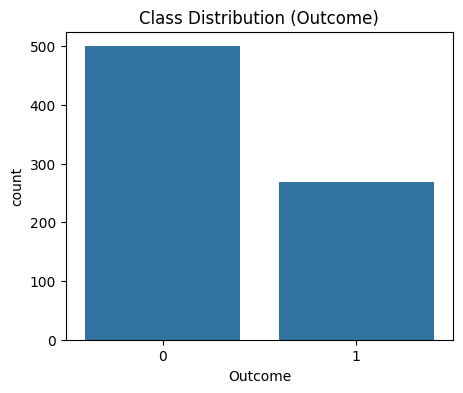

In [50]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome',data = data)
plt.title("Class Distribution (Outcome)")
plt.show()

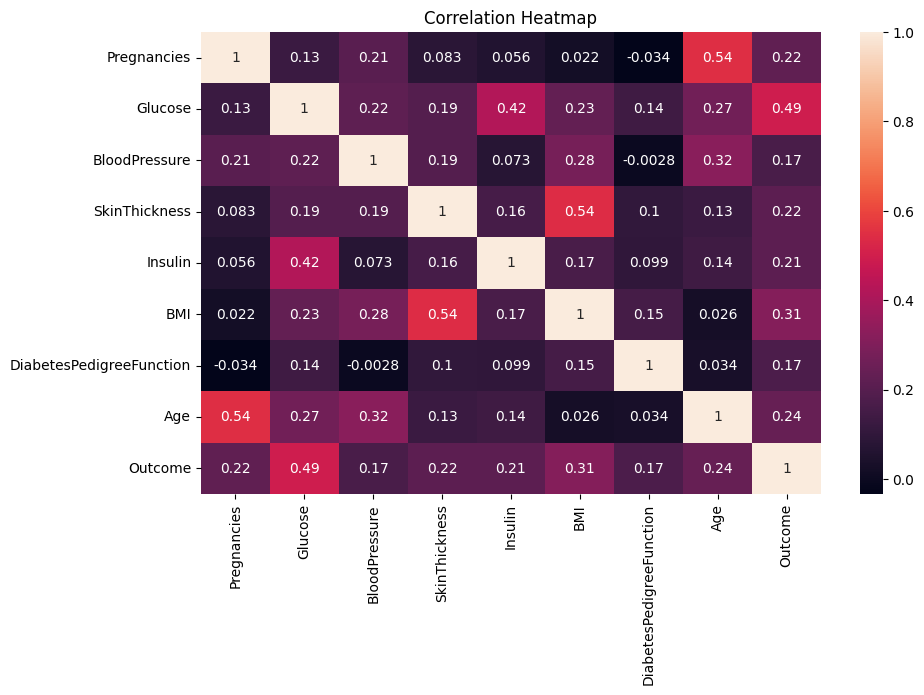

In [51]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),annot = True)
plt.title('Correlation Heatmap')
plt.show()

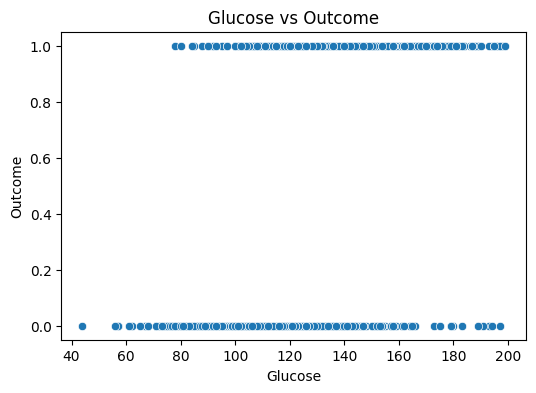

In [52]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Glucose", y="Outcome", data=data)
plt.title("Glucose vs Outcome")
plt.show()

In [53]:
X= data.drop(columns=["Outcome"])
y = data["Outcome"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [57]:
y_pred = (y_pred >= 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)

In [58]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("MSE:", mse)
print("R² Score:", r2)
print("Accuracy:", acc)

Coefficient (slope): 0.01128383030925755
Intercept: -1.066878471087143
MSE: 0.16432413567489235
R² Score: 0.2842770979493576
Accuracy: 0.7727272727272727


In [59]:
example = np.array([[6, 148, 72, 35, 125, 33.6, 0.627, 50]])  
predicted_outcome = model.predict(example)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
print(predicted_outcome[0])

0.6798082912140164


In [62]:
import pickle

# Save the multiple linear regression model as pickle
with open("diabetes_linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as diabetes_linear_model.pkl")


Model saved as diabetes_linear_model.pkl
